In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [2]:
gameplays = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\gameplays.json").readlines()).apply(json.loads))
gameplays

,UUID,events,logs,obstacles,nr_jumps,playIntro,newHighScore,distanceRan,actualDistance,invertedGameOver,...,parameters.CLEAR_TIME,parameters.MAX_OBSTACLE_LENGTH,parameters.MAX_SPEED,parameters.PTERODACTYL_YPOS,parameters.MAX_GAP,parameters.OBSTACLE_TYPES_SPEC.CACTUS_SMALL,collisionObstacle.typeConfig.yPosMobile,collisionObstacle.typeConfig.numFrames,collisionObstacle.typeConfig.frameRate,collisionObstacle.typeConfig.speedOffset
0,4973e61c-c96c-47a0-bbc8-6671d7480341,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 1366.32999998983...",[{'obstacle': {'typeConfig': {'type': 'PTERODA...,3,True,True,1849.010193,46,False,...,2573,1,8,"[100, 50]",386,NaN,NaN,NaN,NaN,NaN
1,4973e61c-c96c-47a0-bbc8-6671d7480341,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 1366.32999998983...",[{'obstacle': {'typeConfig': {'type': 'PTERODA...,4,True,True,2468.715388,62,False,...,2573,1,8,"[100, 50]",386,NaN,NaN,NaN,NaN,NaN
2,4973e61c-c96c-47a0-bbc8-6671d7480341,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 1366.32999998983...",[{'obstacle': {'typeConfig': {'type': 'PTERODA...,4,True,True,1863.531471,47,False,...,2833,3,13,"[75, 50]",357,0.2,NaN,NaN,NaN,NaN
3,4973e61c-c96c-47a0-bbc8-6671d7480341,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 1366.32999998983...",[{'obstacle': {'typeConfig': {'type': 'PTERODA...,4,True,True,1863.531471,47,False,...,2833,3,13,"[75, 50]",357,0.2,NaN,NaN,NaN,NaN
4,6597767d-39cf-406d-91aa-c978e9692138,"[{'time': 1000, 'event': {'type': 'mousedown'}...","[{'log': 'startJump', 'time': 2746.11999999615...",[{'obstacle': {'typeConfig': {'type': 'PTERODA...,1,True,True,1999.396087,50,False,...,2967,1,14,"[100, 75]",336,NaN,"[100, 50]",2.0,166.666667,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,8acb006d-f5e4-467f-8873-ea12705524eb,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 4354.21999999380...",[{'obstacle': {'typeConfig': {'type': 'CACTUS_...,28,True,True,14412.163873,360,False,...,3486,1,13,"[100, 75]",386,0.9,NaN,NaN,NaN,NaN
1067,8acb006d-f5e4-467f-8873-ea12705524eb,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 4354.21999999380...",[{'obstacle': {'typeConfig': {'type': 'CACTUS_...,46,True,True,53007.501107,1325,False,...,2081,1,11,[50],386,0.2,NaN,NaN,NaN,NaN
1068,467c6d9f-4c54-47a7-b843-6cc7cec518d0,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 4725.05999999702...",[{'obstacle': {'typeConfig': {'type': 'CACTUS_...,33,True,True,24688.498176,617,False,...,2784,3,8,[50],307,0.5,NaN,NaN,NaN,NaN
1069,467c6d9f-4c54-47a7-b843-6cc7cec518d0,"[{'time': 1000, 'event': {'type': 'keydown', '...","[{'log': 'startJump', 'time': 4725.05999999702...",[{'obstacle': {'typeConfig': {'type': 'CACTUS_...,44,True,True,11757.881482,294,False,...,3882,1,15,"[75, 50]",396,NaN,NaN,NaN,NaN,NaN


In [3]:
# secondlastentry & lastentry correspond to '_id.$oid' from gameplays db

questionresponses = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\questionresponses.json").readlines()).apply(json.loads))

d = {
  "A": "secondlastentry",
  "B": "lastentry"
}
def AB_to_entry(x):
    if x in d:
        return d[x]
    else:
        return x
    
def replace_column(db, column, function):
    db[column] = db[column].apply(function)

replace_column(questionresponses, "fun", lambda x: AB_to_entry(x))
replace_column(questionresponses, "challenging", lambda x: AB_to_entry(x))
replace_column(questionresponses, "frustrating", lambda x: AB_to_entry(x))
questionresponses

,secondlastentry,lastentry,fun,challenging,frustrating,time,USERID,_id.$oid
0,5fb6e066578328c98e6322cf,5fb6e45fb472c8cc964ed7b7,lastentry,lastentry,secondlastentry,22819.465,6597767d-39cf-406d-91aa-c978e9692138,5fb6e479b472c8cc964ed7b8
1,5fb6e320578328c98e6322d0,5fb6efe9b472c8cc964ed7b9,secondlastentry,lastentry,both,3501.885,4973e61c-c96c-47a0-bbc8-6671d7480341,5fb6eff0b472c8cc964ed7ba
2,5fb7e437b472c8cc964ed7bc,5fb7e442b472c8cc964ed7bd,lastentry,lastentry,lastentry,6717.495,8284f581-eb66-4c8b-95ce-16b161b68e2a,5fb7e44bb472c8cc964ed7be
3,5fb7ed35b472c8cc964ed7bf,5fb7ed58b472c8cc964ed7c0,lastentry,neither,neither,19231.370,8b17c68b-e9ff-454c-80c0-41baea4bb272,5fb7ed6eb472c8cc964ed7c1
4,5fb7eeb8b472c8cc964ed7c2,5fb7eeebb472c8cc964ed7c3,lastentry,secondlastentry,secondlastentry,11961.000,c6291e5d-f5f6-4ed7-b403-818ec9814067,5fb7eefab472c8cc964ed7c4
...,...,...,...,...,...,...,...,...
518,605214f21066e2827b2a39ec,6052152e1066e2827b2a39ed,lastentry,lastentry,secondlastentry,11938.165,b565c9e2-fcb8-4d63-acdb-b43ca628ef71,6052153d1066e2827b2a39ee
519,6052175d1066e2827b2a39ef,605217731066e2827b2a39f0,lastentry,lastentry,secondlastentry,6981.965,b1dbb85d-bdee-436e-b781-e869d7c86a3f,6052177d1066e2827b2a39f1
520,605217731066e2827b2a39f0,605217c61066e2827b2a39f2,secondlastentry,secondlastentry,lastentry,7266.165,b1dbb85d-bdee-436e-b781-e869d7c86a3f,605217d01066e2827b2a39f3
521,605625cd1066e2827b2a39fa,605626261066e2827b2a39fb,secondlastentry,secondlastentry,secondlastentry,78137.420,8acb006d-f5e4-467f-8873-ea12705524eb,605626781066e2827b2a39fc


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


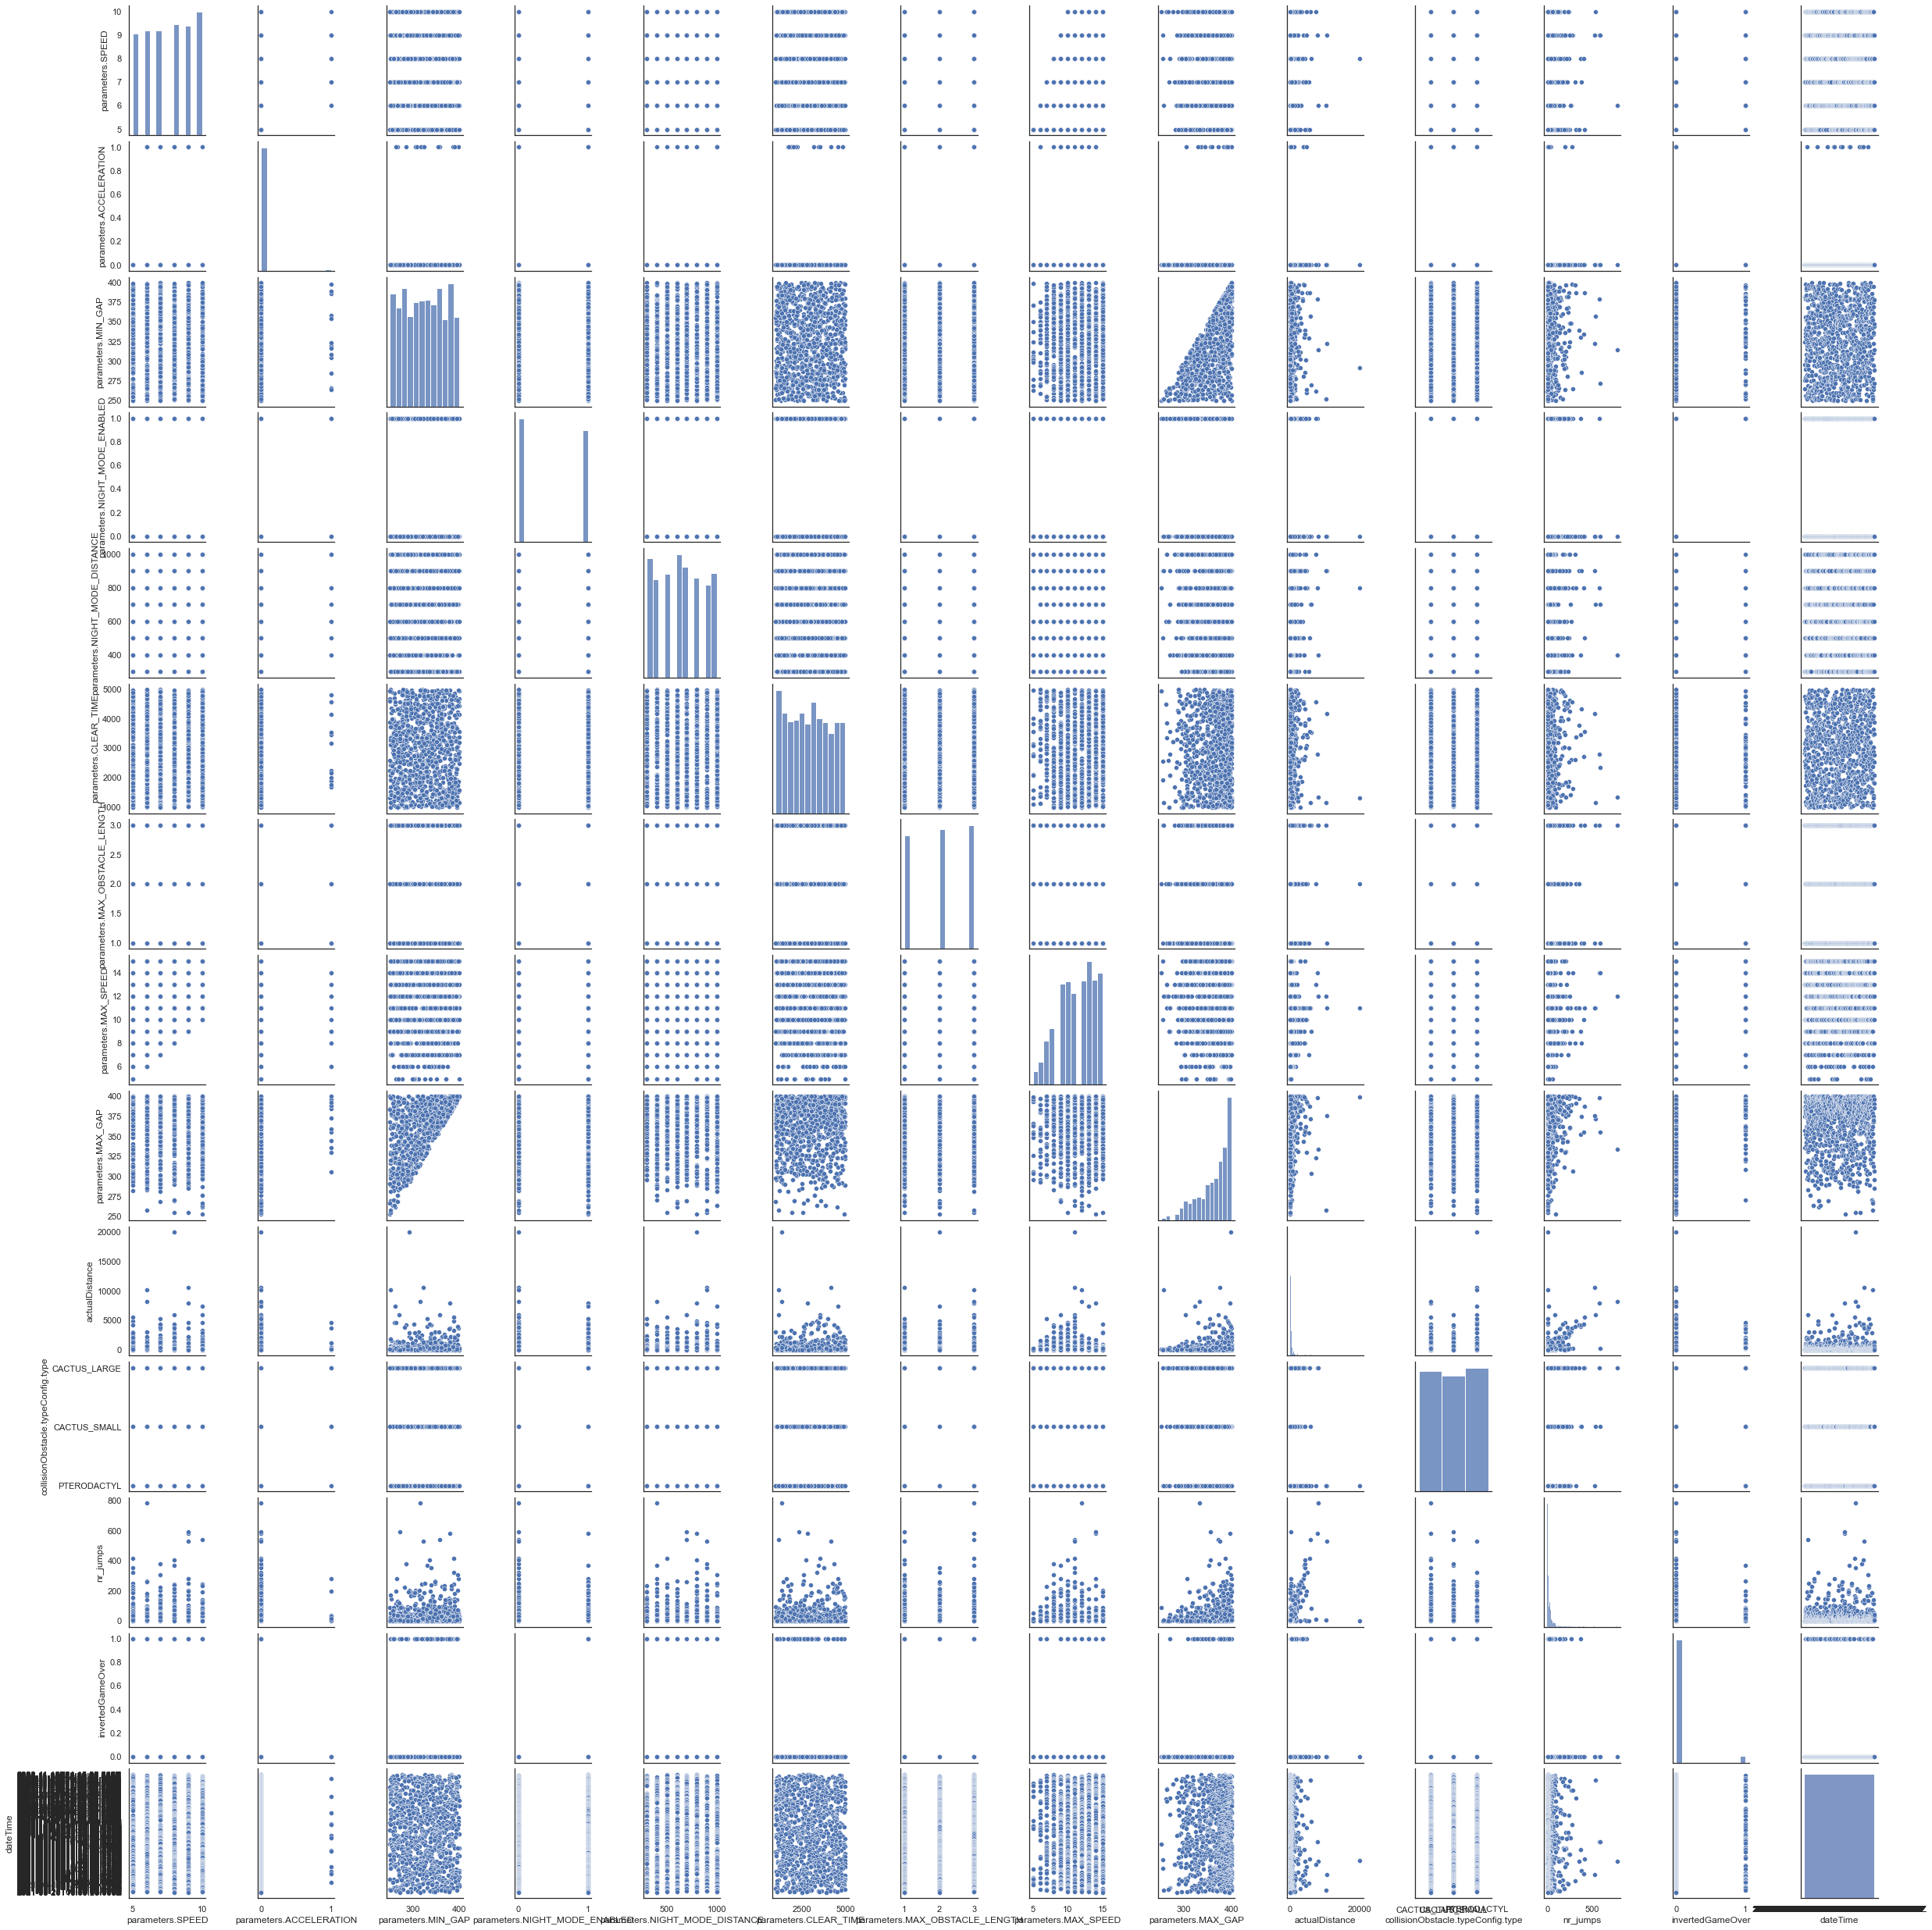

In [5]:
parameters = ['parameters.SPEED', 
              'parameters.ACCELERATION',
              'parameters.MIN_GAP',
              'parameters.NIGHT_MODE_ENABLED', 
              'parameters.NIGHT_MODE_DISTANCE',
              'parameters.CLEAR_TIME', 
              'parameters.MAX_OBSTACLE_LENGTH',
              'parameters.MAX_SPEED',
              'parameters.MAX_GAP', 
              'actualDistance', 
              'collisionObstacle.typeConfig.type',
              'nr_jumps',
              'invertedGameOver',
              'dateTime'
             ] 
sns.pairplot(
    gameplays,
    x_vars= parameters,
    y_vars= parameters
)